In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA

In [40]:
#Завдання 1
#У цьому завданні вам потрібно завантажити ось цей датасет. Тут ви знайдете 2 файли - з двовимірним 
#датасетом та датасетом mnist. Для кожного з них застосуйте алгоритм K-means для кластеризації. 
#Щоб знайти оптимальну кількість кластерів, скористайтесь ліктевим методом.

def k_means(data_set):
    kmeans_2d = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=50, n_init="auto").fit(data_set)
        kmeans_2d.append(np.round(kmeans.inertia_, 4))
    return kmeans_2d

def elbow_method(data_set, name_csv):
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, 11), data_set, marker='o')
    plt.xlabel('Номер кластера')
    plt.title('Метод ліктя для ' + name_csv)
    plt.show()

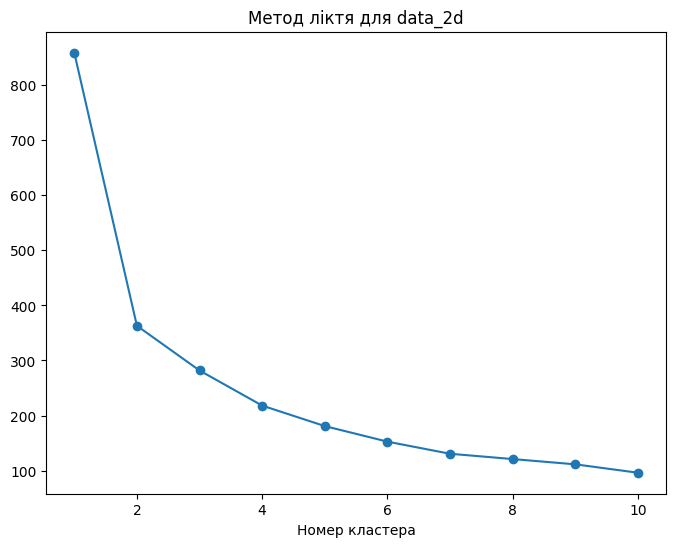

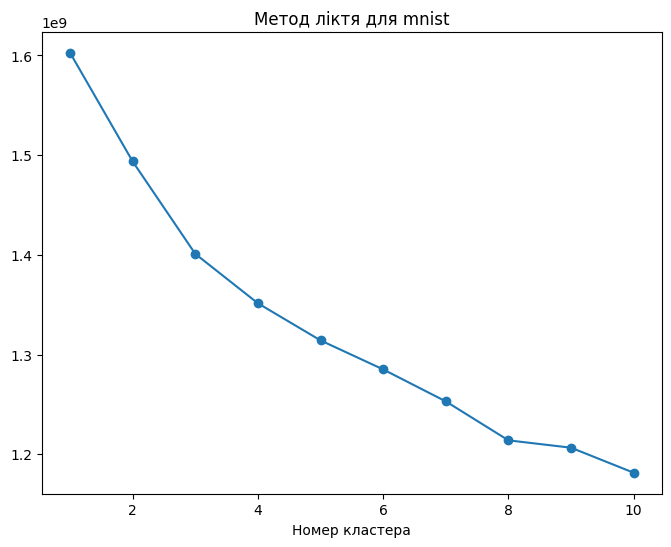

In [41]:
data_2d = pd.read_csv('data/data_2d.csv')
data_mnist = pd.read_csv('data/mnist.csv')

k_means_data_2d = k_means(data_2d)
k_means_data_mnist = k_means(data_mnist)

elbow_method(k_means_data_2d, 'data_2d')
elbow_method(k_means_data_mnist, 'mnist')

In [42]:
optimal_clusters_count_2d = 2
optimal_clusters_count_mnist = 8

print('Оптимальна кількість кластерів для data_2d = ', optimal_clusters_count_2d)
print('Оптимальна кількість кластерів для mnist = ', optimal_clusters_count_mnist)

Оптимальна кількість кластерів для data_2d =  2
Оптимальна кількість кластерів для mnist =  8


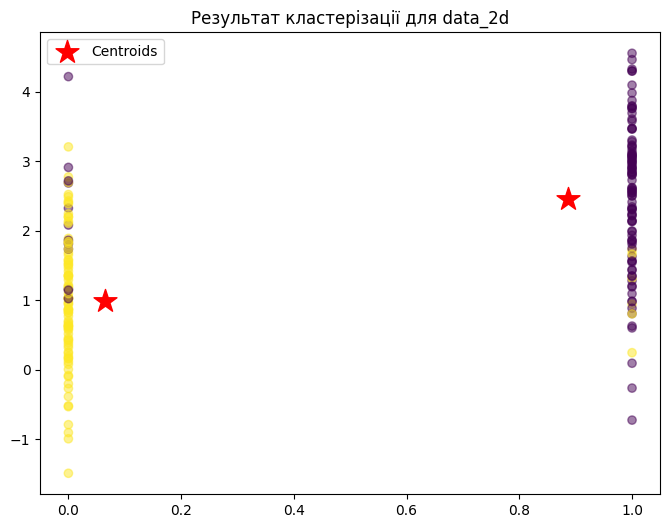

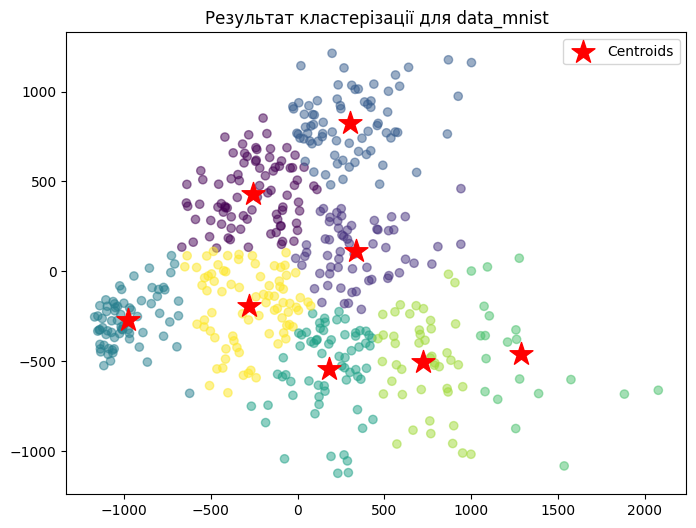

In [43]:
#Завдання 2
#Візуалізуйте результат роботи кластеризації. Для випадку з mnist датасетом, 
#вам потрібно ще скористатись алгоримтом PCA щоб зменшити розмірність вашим даних до 2-вимірного варіанту.

def k_means_with_optimal_clusters_count(data_set, clusters_count):
    kmeans_data = KMeans(n_clusters=clusters_count, random_state=50, n_init="auto").fit(data_set)
    label_data = kmeans_data.labels_
    return kmeans_data, label_data

def plt_with_optimal_clusters_count(data_set, kmeans_data, label_data, data_set_name):
    plt.figure(figsize=(8, 6))
    if isinstance(data_set, pd.DataFrame):
        plt.scatter(data_set.iloc[:, 0], data_set.iloc[:, 1], c=label_data, cmap='viridis', alpha=0.5)
    elif isinstance(data_set, np.ndarray):
        plt.scatter(data_set[:, 0], data_set[:, 1], c=label_data, cmap='viridis', alpha=0.5)
    else:
        raise TypeError("Unsupported data type. Supported types are DataFrame and numpy.ndarray.")
        
    plt.scatter(kmeans_data.cluster_centers_[:, 0], kmeans_data.cluster_centers_[:, 1], marker='*', s=300, c='red', label='Centroids')
    plt.title('Результат кластерізації для ' + str(data_set_name))
    plt.legend()
    plt.show()


pca = PCA(n_components=2)
data_mnist_reduced = pca.fit_transform(data_mnist)

kmeans_data_2d, label_data_2d = k_means_with_optimal_clusters_count(data_2d, optimal_clusters_count_2d)
kmeans_mnist, label_mnist = k_means_with_optimal_clusters_count(data_mnist_reduced, optimal_clusters_count_mnist)

plt_with_optimal_clusters_count(data_2d, kmeans_data_2d, label_data_2d, 'data_2d')
plt_with_optimal_clusters_count(data_mnist_reduced, kmeans_mnist, label_mnist, 'data_mnist')